In [5]:
! ls data/


BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [11]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set(style = 'darkgrid')

In [12]:
df = pd.read_csv('data/budget-sample.csv')


<AxesSubplot:xlabel='base_salary', ylabel='Count'>

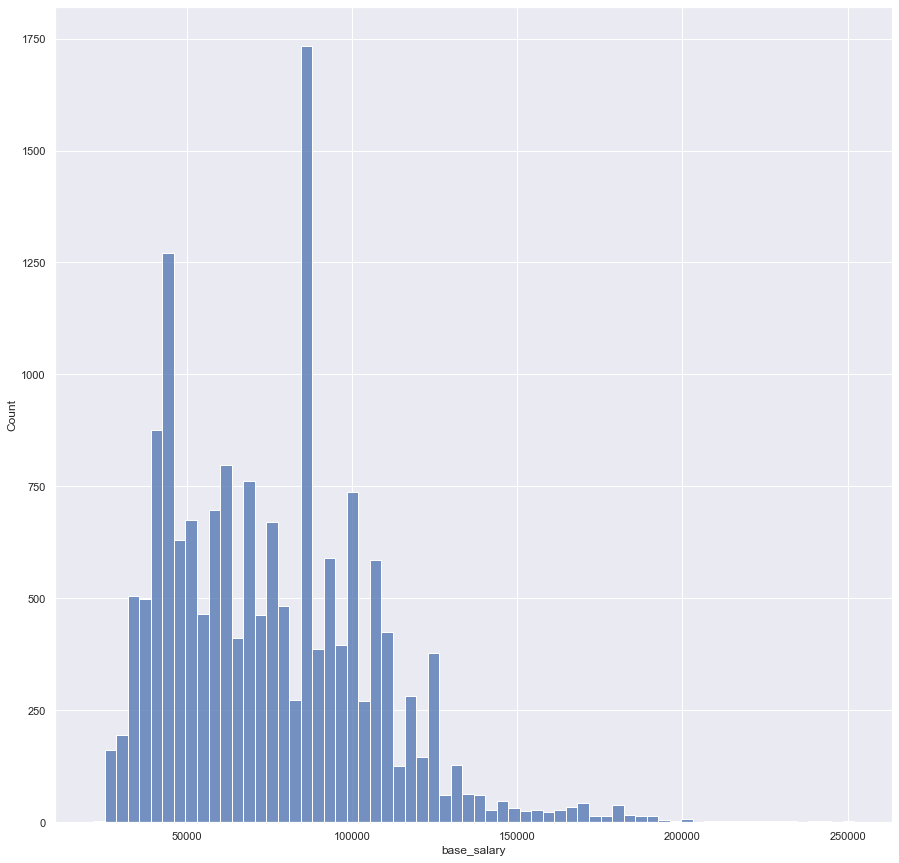

In [13]:
plt.figure(figsize=(15, 15))
sns.histplot(data=df, x='base_salary')



## This seems to be postively skewed where the outliers are making more money than most.

Text(0.5, 0, 'Base Salary')

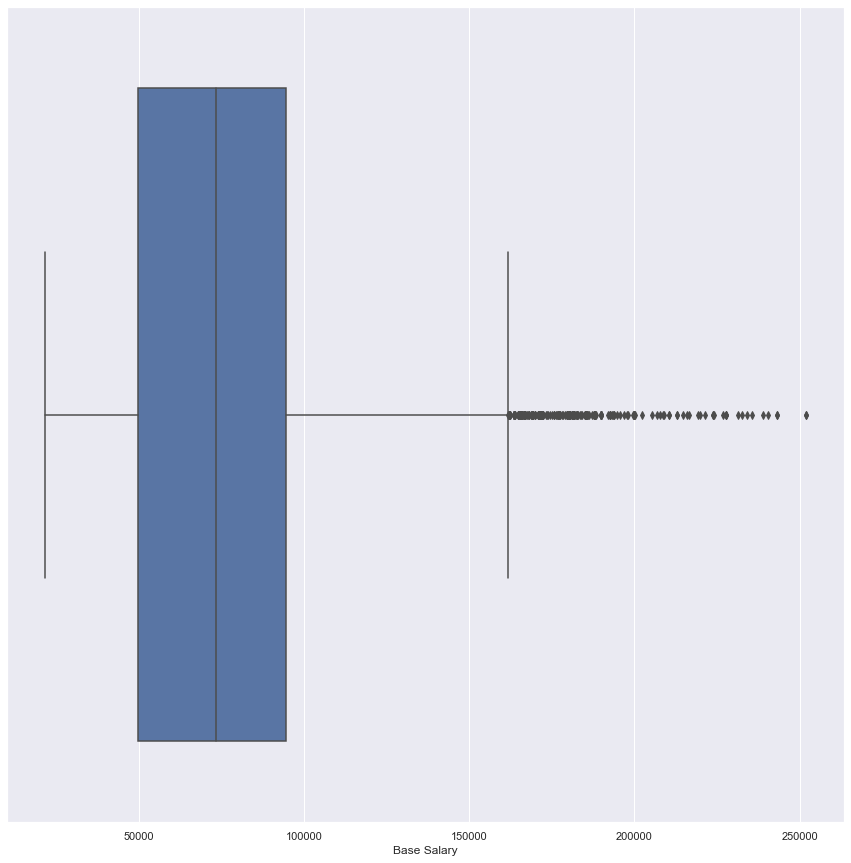

In [14]:
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, x='base_salary')
plt.xlabel('Base Salary')



## Interestingly, the mean is maybe around 60 - 75 thousand on the boxplot

<AxesSubplot:xlabel='base_salary', ylabel='work_location_borough'>

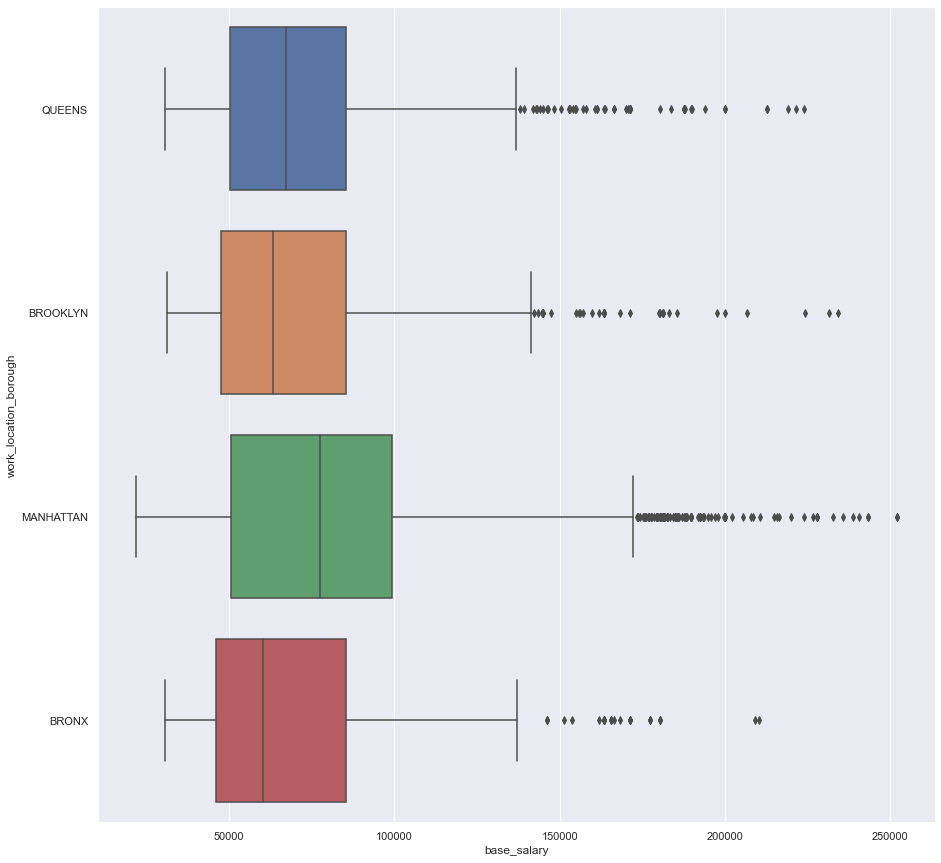

In [15]:
plt.figure(figsize=(15, 15))
sns.boxplot(x = df['base_salary'],y = df['work_location_borough'])

## the average base salary is higher in manhattan vs the other boroughs

In [27]:
gb = df.groupby(['agency_name'])['base_salary'].mean().reset_index().sort_values('base_salary', ascending=False)[:5]
gb

,agency_name,base_salary
67,NYC FIRE PENSION FUND,227786.000000
65,NYC DEPT OF VETERANS' SERVICES,144633.333333
15,CIVIL SERVICE COMMISSION,140000.000000
71,OFFICE OF COLLECTIVE BARGAININ,135000.000000
84,TAX COMMISSION,129626.700000


Text(0, 0.5, 'Agency Name')

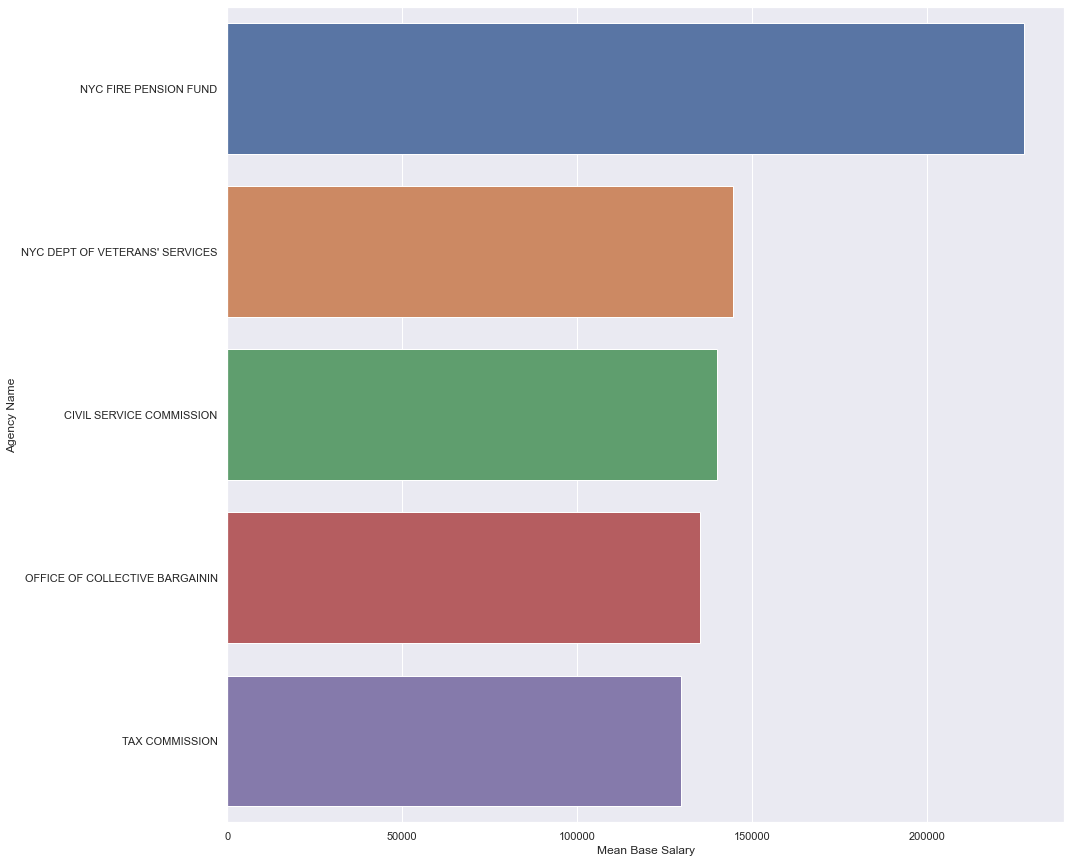

In [28]:
plt.figure(figsize=(15, 15))
sns.barplot(data=gb,x='base_salary', y='agency_name')
plt.xlabel('Mean Base Salary')
plt.ylabel('Agency Name')



# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [29]:
df = pd.read_csv('data/BX-Police.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


<AxesSubplot:xlabel='fiscal_year', ylabel='base_salary'>

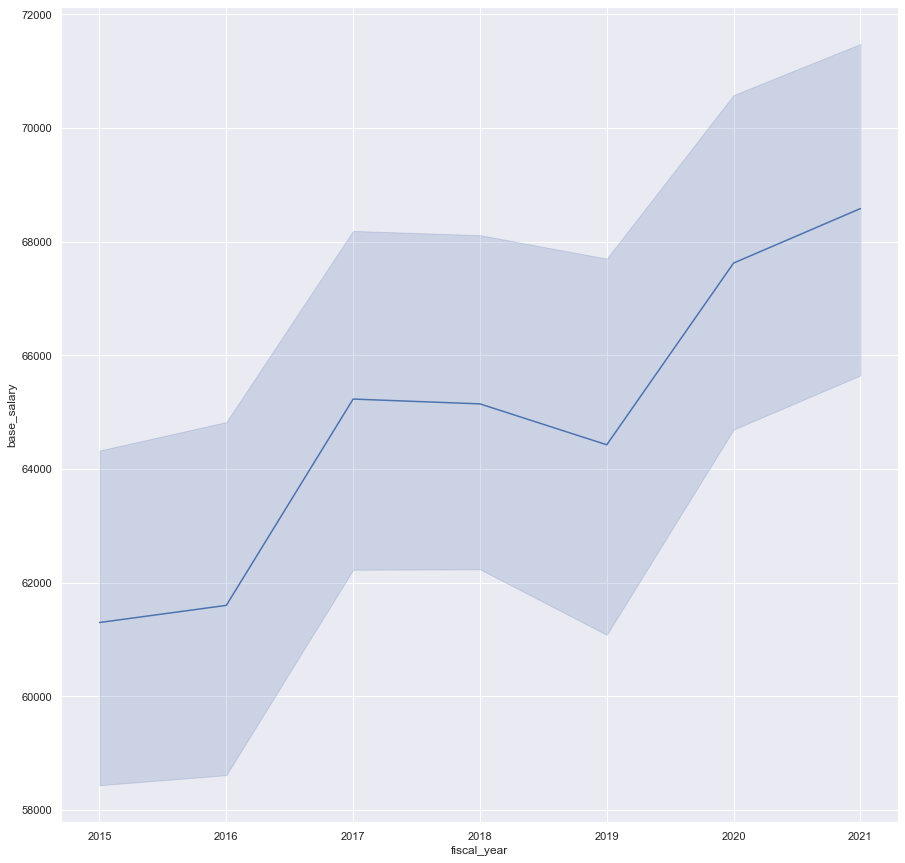

In [31]:
plt.figure(figsize=(15, 15))
sns.lineplot(x = df['fiscal_year'],y = df['base_salary'])



### the trend is positive and it may indicate that they got a bigger budget to play around with 

# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [35]:
stocks = pd.read_csv("data/Stocks.csv")

<AxesSubplot:xlabel='Date', ylabel='High'>

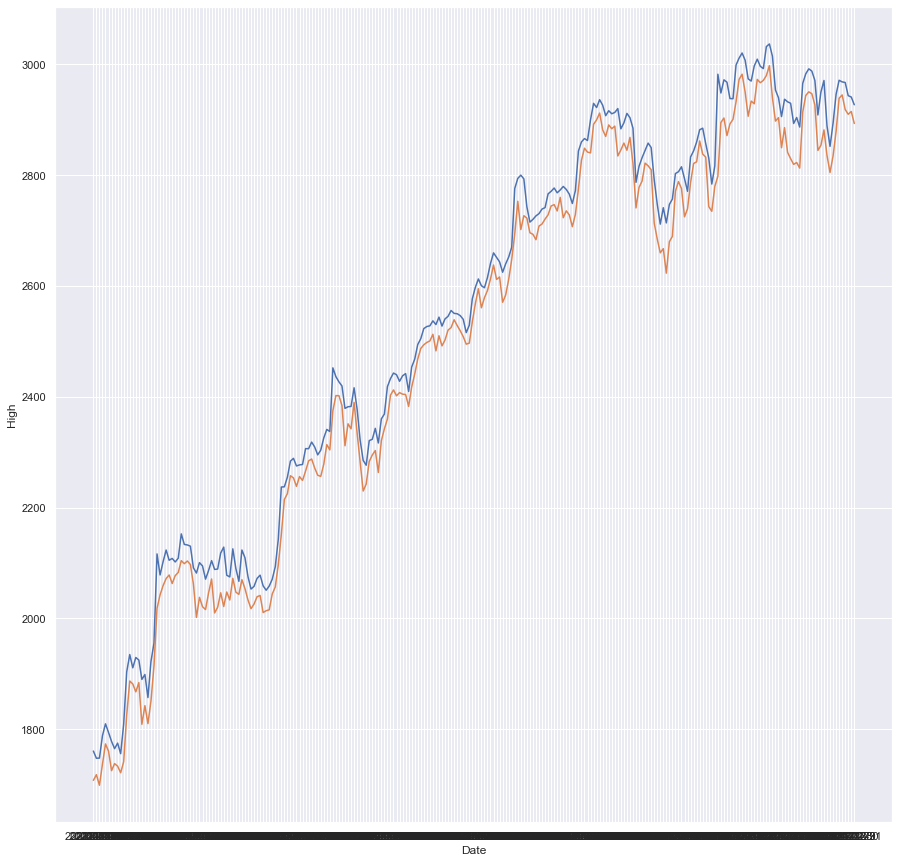

In [37]:
plt.figure(figsize=(15, 15))
sns.lineplot(data=stocks, x="Date", y="High")
sns.lineplot(data=stocks, x="Date", y="Low")

## Positive trend

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [39]:
sales_df = pd.read_csv("data/Sales.csv")
sales_df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740
5,6,2760,1555,4890,7490,1890,1555
6,7,2980,1120,4780,8980,1780,1120
7,8,3700,1400,5860,9960,2860,1400
8,9,3540,1780,6100,8100,2100,1780
9,10,1990,1890,8300,10300,2300,1890


In [42]:
item = list(sales_df.drop("month_number",axis = 1))
item

['facecream',
 'facewash',
 'toothpaste',
 'bathingsoap',
 'shampoo',
 'moisturizer']

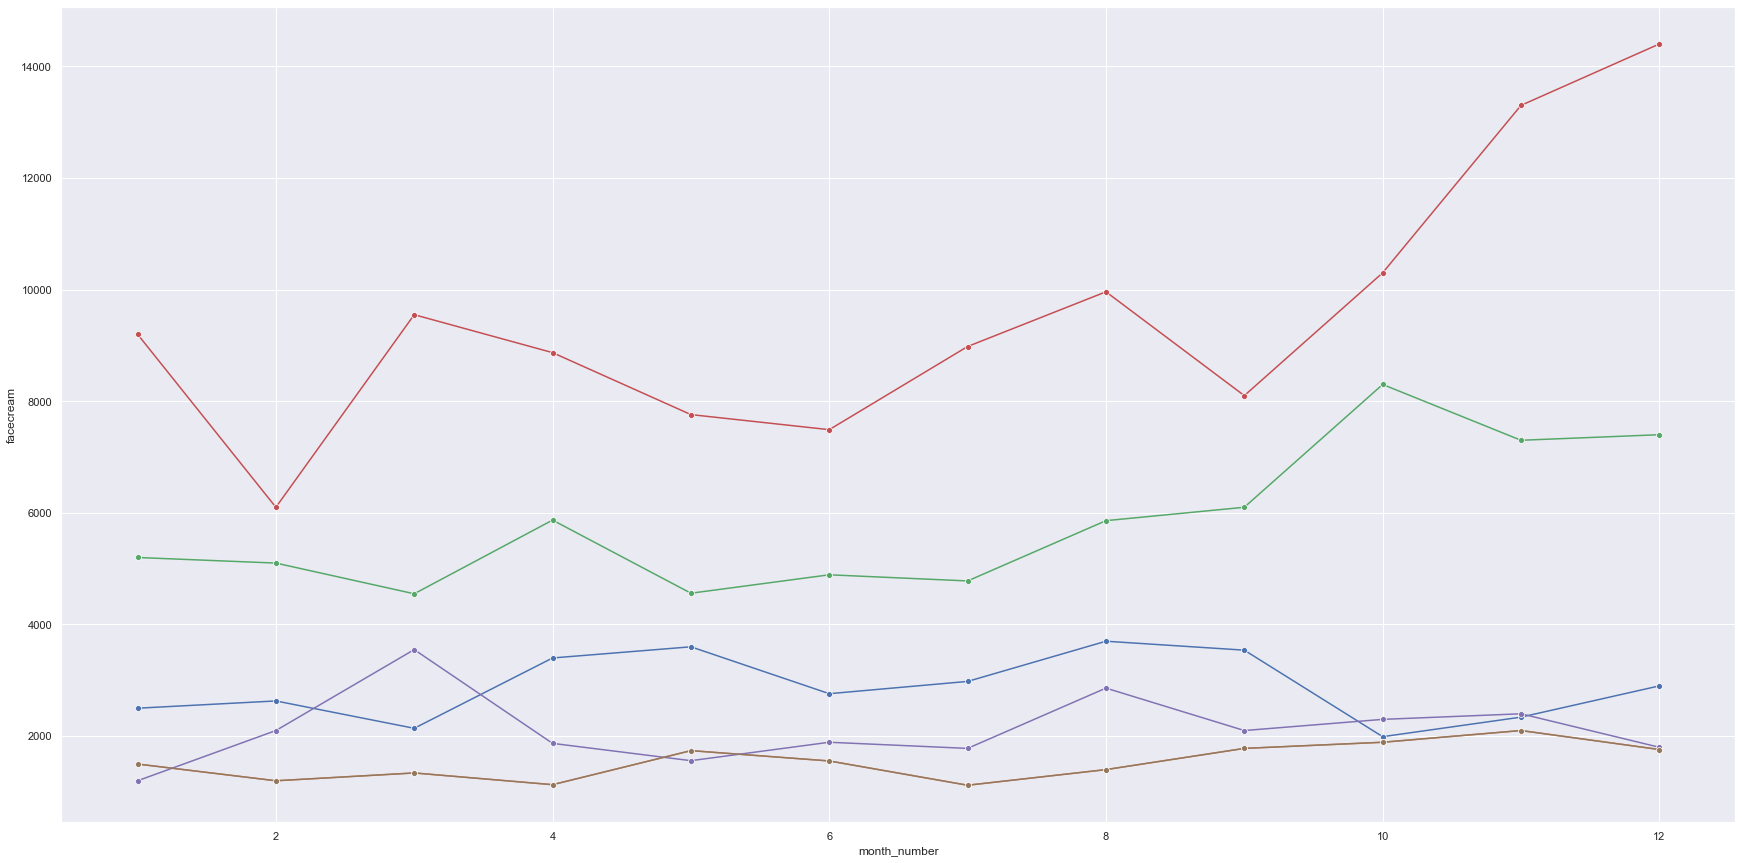

In [43]:
plt.figure(figsize=(30,15))

for i in item:
    sns.lineplot(x='month_number', y=i, data=sales_df, marker='o')
